In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import xgboost as xgb

In [2]:
# Specify the path to the downloaded dataset file on your local machine
file_path = "breast+cancer+wisconsin+original/breast-cancer-wisconsin.data"

# Define column names for the dataset
column_names = ["Sample_Code_Number", "Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape",
                "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli",
                "Mitoses", "Class"]

# Read the dataset file into a pandas DataFrame
df = pd.read_csv(file_path, names=column_names)

# Display the first few rows of the DataFrame to verify the data loading
df.head()

,Sample_Code_Number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [4]:
df.isna().sum()

Sample_Code_Number             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
list = df.columns.tolist
list()

['Sample_Code_Number',
 'Clump_Thickness',
 'Uniformity_of_Cell_Size',
 'Uniformity_of_Cell_Shape',
 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses',
 'Class']

In [6]:
df.Clump_Thickness.value_counts().sort_index(ascending=True)

1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: Clump_Thickness, dtype: int64

In [7]:
df.Uniformity_of_Cell_Size.value_counts().sort_index(ascending=True)

1     384
2      45
3      52
4      40
5      30
6      27
7      19
8      29
9       6
10     67
Name: Uniformity_of_Cell_Size, dtype: int64

In [8]:
df.Uniformity_of_Cell_Shape.value_counts().sort_index(ascending=True)

1     353
2      59
3      56
4      44
5      34
6      30
7      30
8      28
9       7
10     58
Name: Uniformity_of_Cell_Shape, dtype: int64

In [9]:
df.Marginal_Adhesion.value_counts().sort_index(ascending=True)

1     407
2      58
3      58
4      33
5      23
6      22
7      13
8      25
9       5
10     55
Name: Marginal_Adhesion, dtype: int64

In [10]:
df.Single_Epithelial_Cell_Size.value_counts().sort_index(ascending=True)

1      47
2     386
3      72
4      48
5      39
6      41
7      12
8      21
9       2
10     31
Name: Single_Epithelial_Cell_Size, dtype: int64

In [11]:
df.Bare_Nuclei.value_counts().sort_index(ascending=True)

1     402
10    132
2      30
3      28
4      19
5      30
6       4
7       8
8      21
9       9
?      16
Name: Bare_Nuclei, dtype: int64

In [12]:
df.Bland_Chromatin.value_counts().sort_index(ascending=True)

1     152
2     166
3     165
4      40
5      34
6      10
7      73
8      28
9      11
10     20
Name: Bland_Chromatin, dtype: int64

In [13]:
df.Normal_Nucleoli.value_counts().sort_index(ascending=True)

1     443
2      36
3      44
4      18
5      19
6      22
7      16
8      24
9      16
10     61
Name: Normal_Nucleoli, dtype: int64

In [14]:
df.Mitoses.value_counts().sort_index(ascending=True)

1     579
2      35
3      33
4      12
5       6
6       3
7       9
8       8
10     14
Name: Mitoses, dtype: int64

In [15]:
df.Class.value_counts().sort_index(ascending=True)

2    458
4    241
Name: Class, dtype: int64

In [16]:
# Remove rows with missing values ('?') in the "Bare Nuclei" column
df = df[df['Bare_Nuclei'] != '?']

# Reset the index of the DataFrame after removing rows
df = df.reset_index(drop=True)

In [17]:
# Check the value counts again to verify that the rows with missing values have been removed
print(df['Bare_Nuclei'].value_counts())

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64


In [18]:
df.shape

(683, 11)

In [19]:
df.head()

,Sample_Code_Number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [20]:
print(df.dtypes)

Sample_Code_Number              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [21]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [22]:
# Remove the "Sample Code Number" column
df.drop("Sample_Code_Number", axis=1,inplace=True)

In [23]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)

In [24]:
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [25]:
df.tail()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4
682,4,8,8,5,4,5,10,4,1,4


In [26]:
# Replace 2 with 0 and 4 with 1 in the 'Class' column
df['Class'] = df['Class'].replace({2: 0, 4: 1})

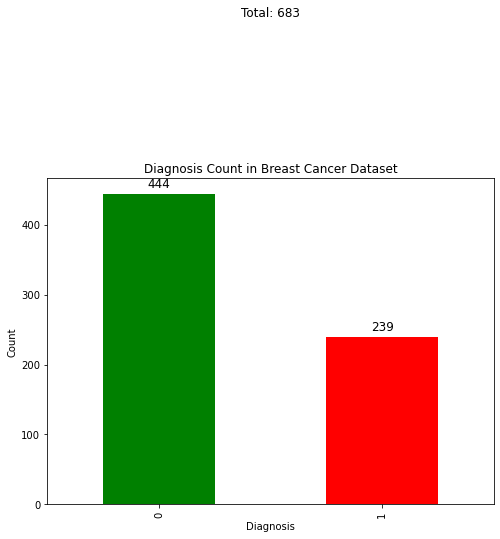

In [27]:
# Group the DataFrame by the "Class" column and count the occurrences of each diagnosis
diagnosis_counts = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = diagnosis_counts.plot(kind='bar', color=['green', 'red'])

# Customize the plot labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Count in Breast Cancer Dataset')

# Annotate the bars with their counts
for i, v in enumerate(diagnosis_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Add the total count as a text annotation
total_count = diagnosis_counts.sum()
plt.text(0.5, total_count + 10, f'Total: {total_count}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

In [28]:
# Prepare the Data
# Separate features and target variable
X = df.drop("Class", axis=1)  # Features
y = df["Class"]  # Target variable

In [29]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=13, stratify=y)

#### KNN

In [108]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

In [109]:
# Specify the number of cross-validation folds (K) - e.g., 5-fold cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

In [110]:
# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')

In [111]:
# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

Cross-Validation Accuracy Scores:
Fold 1: 0.970803
Fold 2: 0.978102
Fold 3: 0.970803
Fold 4: 0.985294
Fold 5: 0.970588


In [112]:
# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")

Mean Accuracy: 0.975118
Standard Deviation: 0.005835


In [113]:
# Initialize lists to store precision and recall values for each fold
precision_per_fold = []
recall_per_fold = []

# Perform K-fold cross-validation and get the predicted labels for each fold
predicted_labels = cross_val_predict(knn, X, y, cv=cv)

# Calculate and print accuracy, precision, and recall for each fold and class
print("Cross-Validation Metrics:")
for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    accuracy = accuracy_score(y[test_idx], predicted_labels[test_idx])
    precision = precision_score(y[test_idx], predicted_labels[test_idx], average=None)
    recall = recall_score(y[test_idx], predicted_labels[test_idx], average=None)
    
    print(f"Fold {i + 1}:")
    print(f"  Accuracy: {accuracy:.6f}")
    
    for class_idx, (prec, rec) in enumerate(zip(precision, recall)):
        print(f"  Class {class_idx + 1}:")
        print(f"    Precision: {prec:.6f}")
        print(f"    Recall: {rec:.6f}")
        print()
    
    # Append precision and recall values for this fold to the lists
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)

# Calculate and print the mean accuracy, precision, and recall across all folds
mean_accuracy = np.mean(scores)

# Calculate mean precision and recall for each class
mean_precision_per_class = np.mean(precision_per_fold, axis=0)
mean_recall_per_class = np.mean(recall_per_fold, axis=0)

# Calculate standard deviation of accuracy, precision, and recall across folds
std_accuracy = np.std(scores)
std_precision_per_class = np.std(precision_per_fold, axis=0)
std_recall_per_class = np.std(recall_per_fold, axis=0)

print("Mean Metrics:")
print(f"Mean Accuracy: {mean_accuracy:.6f}")

for class_idx, (mean_prec, mean_rec) in enumerate(zip(mean_precision_per_class, mean_recall_per_class)):
    print(f"Class {class_idx + 1}:")
    print(f"  Mean Precision: {mean_prec:.6f}")
    print(f"  Mean Recall: {mean_rec:.6f}")
    print()

print("Standard Deviation Metrics:")
print(f"Standard Deviation Accuracy: {std_accuracy:.6f}")

for class_idx, (std_prec, std_rec) in enumerate(zip(std_precision_per_class, std_recall_per_class)):
    print(f"Class {class_idx + 1}:")
    print(f"  Standard Deviation Precision: {std_prec:.6f}")
    print(f"  Standard Deviation Recall: {std_rec:.6f}")


Cross-Validation Metrics:
Fold 1:
  Accuracy: 0.970803
  Class 1:
    Precision: 0.988506
    Recall: 0.966292

  Class 2:
    Precision: 0.940000
    Recall: 0.979167

Fold 2:
  Accuracy: 0.978102
  Class 1:
    Precision: 0.977778
    Recall: 0.988764

  Class 2:
    Precision: 0.978723
    Recall: 0.958333

Fold 3:
  Accuracy: 0.970803
  Class 1:
    Precision: 0.977528
    Recall: 0.977528

  Class 2:
    Precision: 0.958333
    Recall: 0.958333

Fold 4:
  Accuracy: 0.985294
  Class 1:
    Precision: 1.000000
    Recall: 0.977528

  Class 2:
    Precision: 0.959184
    Recall: 1.000000

Fold 5:
  Accuracy: 0.970588
  Class 1:
    Precision: 0.966667
    Recall: 0.988636

  Class 2:
    Precision: 0.978261
    Recall: 0.937500

Mean Metrics:
Mean Accuracy: 0.975118
Class 1:
  Mean Precision: 0.982096
  Mean Recall: 0.979750

Class 2:
  Mean Precision: 0.962900
  Mean Recall: 0.966667

Standard Deviation Metrics:
Standard Deviation Accuracy: 0.005835
Class 1:
  Standard Deviation Pre

##### 60 - 40 split model training and evaluation for KNN

In [114]:
# Fit KNN model for train set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Classification Report:
              precision    recall  f1-score   support

           0   0.982955  0.971910  0.977401       178
           1   0.948980  0.968750  0.958763        96

    accuracy                       0.970803       274
   macro avg   0.965967  0.970330  0.968082       274
weighted avg   0.971051  0.970803  0.970871       274



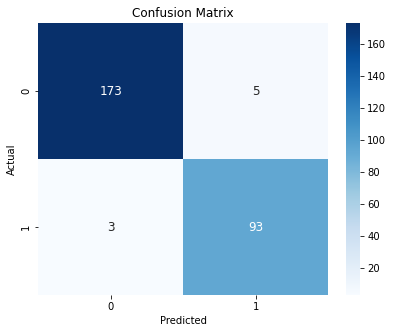

In [115]:
# Use the trained KNN model to make predictions on the test data
y_pred = knn.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### NBC

In [116]:
# Create and train the Gaussian Naive Bayes model
naive_bayes = GaussianNB()

In [117]:
# Specify the number of cross-validation folds (K) - e.g., 5-fold cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

In [118]:
# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(naive_bayes, X, y, cv=cv, scoring='accuracy')

In [119]:
# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

Cross-Validation Accuracy Scores:
Fold 1: 0.970803
Fold 2: 0.941606
Fold 3: 0.963504
Fold 4: 0.970588
Fold 5: 0.963235


In [120]:
# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")

Mean Accuracy: 0.961947
Standard Deviation: 0.010686


In [121]:
# Initialize lists to store precision and recall values for each fold
precision_per_fold = []
recall_per_fold = []

# Perform K-fold cross-validation and get the predicted labels for each fold
predicted_labels = cross_val_predict(naive_bayes, X, y, cv=cv)

# Calculate and print accuracy, precision, and recall for each fold and class
print("Cross-Validation Metrics:")
for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    accuracy = accuracy_score(y[test_idx], predicted_labels[test_idx])
    precision = precision_score(y[test_idx], predicted_labels[test_idx], average=None)
    recall = recall_score(y[test_idx], predicted_labels[test_idx], average=None)
    
    print(f"Fold {i + 1}:")
    print(f"  Accuracy: {accuracy:.6f}")
    
    for class_idx, (prec, rec) in enumerate(zip(precision, recall)):
        print(f"  Class {class_idx + 1}:")
        print(f"    Precision: {prec:.6f}")
        print(f"    Recall: {rec:.6f}")
        print()
    
    # Append precision and recall values for this fold to the lists
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)

# Calculate and print the mean accuracy, precision, and recall across all folds
mean_accuracy = np.mean(scores)

# Calculate mean precision and recall for each class
mean_precision_per_class = np.mean(precision_per_fold, axis=0)
mean_recall_per_class = np.mean(recall_per_fold, axis=0)

# Calculate standard deviation of accuracy, precision, and recall across folds
std_accuracy = np.std(scores)
std_precision_per_class = np.std(precision_per_fold, axis=0)
std_recall_per_class = np.std(recall_per_fold, axis=0)

print("Mean Metrics:")
print(f"Mean Accuracy: {mean_accuracy:.6f}")

for class_idx, (mean_prec, mean_rec) in enumerate(zip(mean_precision_per_class, mean_recall_per_class)):
    print(f"Class {class_idx + 1}:")
    print(f"  Mean Precision: {mean_prec:.6f}")
    print(f"  Mean Recall: {mean_rec:.6f}")
    print()

print("Standard Deviation Metrics:")
print(f"Standard Deviation Accuracy: {std_accuracy:.6f}")

for class_idx, (std_prec, std_rec) in enumerate(zip(std_precision_per_class, std_recall_per_class)):
    print(f"Class {class_idx + 1}:")
    print(f"  Standard Deviation Precision: {std_prec:.6f}")
    print(f"  Standard Deviation Recall: {std_rec:.6f}")


Cross-Validation Metrics:
Fold 1:
  Accuracy: 0.970803
  Class 1:
    Precision: 0.988506
    Recall: 0.966292

  Class 2:
    Precision: 0.940000
    Recall: 0.979167

Fold 2:
  Accuracy: 0.941606
  Class 1:
    Precision: 0.965517
    Recall: 0.943820

  Class 2:
    Precision: 0.900000
    Recall: 0.937500

Fold 3:
  Accuracy: 0.963504
  Class 1:
    Precision: 1.000000
    Recall: 0.943820

  Class 2:
    Precision: 0.905660
    Recall: 1.000000

Fold 4:
  Accuracy: 0.970588
  Class 1:
    Precision: 0.988506
    Recall: 0.966292

  Class 2:
    Precision: 0.938776
    Recall: 0.978723

Fold 5:
  Accuracy: 0.963235
  Class 1:
    Precision: 0.988235
    Recall: 0.954545

  Class 2:
    Precision: 0.921569
    Recall: 0.979167

Mean Metrics:
Mean Accuracy: 0.961947
Class 1:
  Mean Precision: 0.986153
  Mean Recall: 0.954954

Class 2:
  Mean Precision: 0.921201
  Mean Recall: 0.974911

Standard Deviation Metrics:
Standard Deviation Accuracy: 0.010686
Class 1:
  Standard Deviation Pre

##### 60 - 40 split model training and evaluation for NBC

In [122]:
# Fit NBC model for train set
naive_bayes.fit(X_train, y_train)

GaussianNB()

Classification Report:
              precision    recall  f1-score   support

           0   0.994118  0.949438  0.971264       178
           1   0.913462  0.989583  0.950000        96

    accuracy                       0.963504       274
   macro avg   0.953790  0.969511  0.960632       274
weighted avg   0.965859  0.963504  0.963814       274



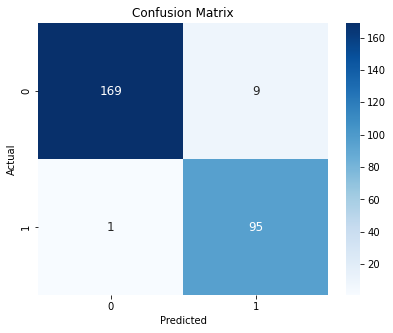

In [123]:
# Use the trained Naive Bayes model to make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### XG Boost

In [43]:
# Create an instance of the XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Specify the number of cross-validation folds (K) - e.g., 5-fold cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': range(50, 251, 50),  # Number of trees in the forest
    'max_depth': range(3, 11),  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for training
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for training
    'min_child_weight': [1, 2, 3, 4],  # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 1e-5, 1e-4, 1e-3, 1e-2],  # L1 regularization term on weights
    'reg_lambda': [0, 1e-5, 1e-4, 1e-3, 1e-2],  # L2 regularization term on weights
    'scale_pos_weight': [1, 2, 3],  # Controls the balance of positive and negative weights
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for training
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of features used for training
    'min_child_weight': [1, 2, 3, 4, 5]  # Minimum sum of instance weight (hessian) needed in a child
}


# Create RandomizedSearchCV with the XGBoost model and parameter grid
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=500,  # Number of random combinations to try
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Perform Randomized Search to find the best hyperparameters
random_search.fit(X, y)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)

# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(best_xgb_model, X, y, cv=cv, scoring='accuracy')

# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")


Best Hyperparameters: {'subsample': 0.7, 'scale_pos_weight': 3, 'reg_lambda': 0.001, 'reg_alpha': 0, 'n_estimators': 150, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
Cross-Validation Accuracy Scores:
Fold 1: 0.970803
Fold 2: 0.985401
Fold 3: 0.985401
Fold 4: 0.970588
Fold 5: 0.992647
Mean Accuracy: 0.980968
Standard Deviation: 0.008795


In [52]:
# Create an instance of the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    subsample=0.7,
    scale_pos_weight=3,
    reg_lambda=0.001,
    reg_alpha=0,
    n_estimators=150,
    min_child_weight=4,
    max_depth=6,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=0.6,
    random_state=13
)

In [53]:
# Specify the number of cross-validation folds (K) - e.g., 5-fold cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

In [54]:
# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')

In [55]:
# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

Cross-Validation Accuracy Scores:
Fold 1: 0.970803
Fold 2: 0.978102
Fold 3: 0.978102
Fold 4: 0.970588
Fold 5: 0.985294


In [56]:
# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")

Mean Accuracy: 0.976578
Standard Deviation: 0.005474


In [57]:
# Initialize lists to store precision and recall values for each fold
precision_per_fold = []
recall_per_fold = []

# Perform K-fold cross-validation and get the predicted labels for each fold
predicted_labels = cross_val_predict(xgb_model, X, y, cv=cv)

# Calculate and print accuracy, precision, and recall for each fold and class
print("Cross-Validation Metrics:")
for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    accuracy = accuracy_score(y[test_idx], predicted_labels[test_idx])
    precision = precision_score(y[test_idx], predicted_labels[test_idx], average=None)
    recall = recall_score(y[test_idx], predicted_labels[test_idx], average=None)
    
    print(f"Fold {i + 1}:")
    print(f"  Accuracy: {accuracy:.6f}")
    
    for class_idx, (prec, rec) in enumerate(zip(precision, recall)):
        print(f"  Class {class_idx + 1}:")
        print(f"    Precision: {prec:.6f}")
        print(f"    Recall: {rec:.6f}")
        print()
    
    # Append precision and recall values for this fold to the lists
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)

# Calculate and print the mean accuracy, precision, and recall across all folds
mean_accuracy = np.mean(scores)

# Calculate mean precision and recall for each class
mean_precision_per_class = np.mean(precision_per_fold, axis=0)
mean_recall_per_class = np.mean(recall_per_fold, axis=0)

# Calculate standard deviation of accuracy, precision, and recall across folds
std_accuracy = np.std(scores)
std_precision_per_class = np.std(precision_per_fold, axis=0)
std_recall_per_class = np.std(recall_per_fold, axis=0)

print("Mean Metrics:")
print(f"Mean Accuracy: {mean_accuracy:.6f}")

for class_idx, (mean_prec, mean_rec) in enumerate(zip(mean_precision_per_class, mean_recall_per_class)):
    print(f"Class {class_idx + 1}:")
    print(f"  Mean Precision: {mean_prec:.6f}")
    print(f"  Mean Recall: {mean_rec:.6f}")
    print()

print("Standard Deviation Metrics:")
print(f"Standard Deviation Accuracy: {std_accuracy:.6f}")

for class_idx, (std_prec, std_rec) in enumerate(zip(std_precision_per_class, std_recall_per_class)):
    print(f"Class {class_idx + 1}:")
    print(f"  Standard Deviation Precision: {std_prec:.6f}")
    print(f"  Standard Deviation Recall: {std_rec:.6f}")


Cross-Validation Metrics:
Fold 1:
  Accuracy: 0.970803
  Class 1:
    Precision: 0.988506
    Recall: 0.966292

  Class 2:
    Precision: 0.940000
    Recall: 0.979167

Fold 2:
  Accuracy: 0.978102
  Class 1:
    Precision: 0.977778
    Recall: 0.988764

  Class 2:
    Precision: 0.978723
    Recall: 0.958333

Fold 3:
  Accuracy: 0.978102
  Class 1:
    Precision: 0.988636
    Recall: 0.977528

  Class 2:
    Precision: 0.959184
    Recall: 0.979167

Fold 4:
  Accuracy: 0.970588
  Class 1:
    Precision: 1.000000
    Recall: 0.955056

  Class 2:
    Precision: 0.921569
    Recall: 1.000000

Fold 5:
  Accuracy: 0.985294
  Class 1:
    Precision: 0.988636
    Recall: 0.988636

  Class 2:
    Precision: 0.979167
    Recall: 0.979167

Mean Metrics:
Mean Accuracy: 0.976578
Class 1:
  Mean Precision: 0.988711
  Mean Recall: 0.975255

Class 2:
  Mean Precision: 0.955728
  Mean Recall: 0.979167

Standard Deviation Metrics:
Standard Deviation Accuracy: 0.005474
Class 1:
  Standard Deviation Pre

##### 60 - 40 split model training and evaluation for XG Boost

In [58]:
# Fit KNN model for train set
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=13, ...)

Classification Report:
              precision    recall  f1-score   support

           0   1.000000  0.966292  0.982857       178
           1   0.941176  1.000000  0.969697        96

    accuracy                       0.978102       274
   macro avg   0.970588  0.983146  0.976277       274
weighted avg   0.979390  0.978102  0.978246       274



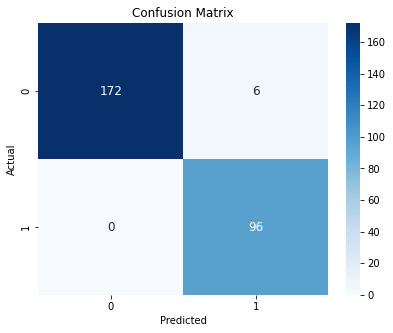

In [59]:
# Use the trained KNN model to make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Random Forest

In [30]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=30,
    min_samples_split=9,
    min_samples_leaf=4,
    criterion='entropy',
    max_features=None,
    bootstrap=True,
    class_weight={0: 1, 1: 2},
    min_impurity_decrease=0.0,
    oob_score=True,
    warm_start=False,
    random_state=42
)

In [31]:
# Specify the number of cross-validation folds (K) - e.g., 5-fold cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

In [33]:
# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

In [34]:
# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

Cross-Validation Accuracy Scores:
Fold 1: 0.956204
Fold 2: 0.963504
Fold 3: 0.978102
Fold 4: 0.970588
Fold 5: 0.970588


In [35]:
# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")

Mean Accuracy: 0.967797
Standard Deviation: 0.007411


In [36]:
# Initialize lists to store precision and recall values for each fold
precision_per_fold = []
recall_per_fold = []

# Perform K-fold cross-validation and get the predicted labels for each fold
predicted_labels = cross_val_predict(rf, X, y, cv=cv)

# Calculate and print accuracy, precision, and recall for each fold and class
print("Cross-Validation Metrics:")
for i, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    accuracy = accuracy_score(y[test_idx], predicted_labels[test_idx])
    precision = precision_score(y[test_idx], predicted_labels[test_idx], average=None)
    recall = recall_score(y[test_idx], predicted_labels[test_idx], average=None)
    
    print(f"Fold {i + 1}:")
    print(f"  Accuracy: {accuracy:.6f}")
    
    for class_idx, (prec, rec) in enumerate(zip(precision, recall)):
        print(f"  Class {class_idx + 1}:")
        print(f"    Precision: {prec:.6f}")
        print(f"    Recall: {rec:.6f}")
        print()
    
    # Append precision and recall values for this fold to the lists
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)

# Calculate and print the mean accuracy, precision, and recall across all folds
mean_accuracy = np.mean(scores)

# Calculate mean precision and recall for each class
mean_precision_per_class = np.mean(precision_per_fold, axis=0)
mean_recall_per_class = np.mean(recall_per_fold, axis=0)

# Calculate standard deviation of accuracy, precision, and recall across folds
std_accuracy = np.std(scores)
std_precision_per_class = np.std(precision_per_fold, axis=0)
std_recall_per_class = np.std(recall_per_fold, axis=0)

print("Mean Metrics:")
print(f"Mean Accuracy: {mean_accuracy:.6f}")

for class_idx, (mean_prec, mean_rec) in enumerate(zip(mean_precision_per_class, mean_recall_per_class)):
    print(f"Class {class_idx + 1}:")
    print(f"  Mean Precision: {mean_prec:.6f}")
    print(f"  Mean Recall: {mean_rec:.6f}")
    print()

print("Standard Deviation Metrics:")
print(f"Standard Deviation Accuracy: {std_accuracy:.6f}")

for class_idx, (std_prec, std_rec) in enumerate(zip(std_precision_per_class, std_recall_per_class)):
    print(f"Class {class_idx + 1}:")
    print(f"  Standard Deviation Precision: {std_prec:.6f}")
    print(f"  Standard Deviation Recall: {std_rec:.6f}")


Cross-Validation Metrics:
Fold 1:
  Accuracy: 0.956204
  Class 1:
    Precision: 0.966292
    Recall: 0.966292

  Class 2:
    Precision: 0.937500
    Recall: 0.937500

Fold 2:
  Accuracy: 0.963504
  Class 1:
    Precision: 0.966667
    Recall: 0.977528

  Class 2:
    Precision: 0.957447
    Recall: 0.937500

Fold 3:
  Accuracy: 0.978102
  Class 1:
    Precision: 1.000000
    Recall: 0.966292

  Class 2:
    Precision: 0.941176
    Recall: 1.000000

Fold 4:
  Accuracy: 0.970588
  Class 1:
    Precision: 1.000000
    Recall: 0.955056

  Class 2:
    Precision: 0.921569
    Recall: 1.000000

Fold 5:
  Accuracy: 0.970588
  Class 1:
    Precision: 0.966667
    Recall: 0.988636

  Class 2:
    Precision: 0.978261
    Recall: 0.937500

Mean Metrics:
Mean Accuracy: 0.967797
Class 1:
  Mean Precision: 0.979925
  Mean Recall: 0.970761

Class 2:
  Mean Precision: 0.947191
  Mean Recall: 0.962500

Standard Deviation Metrics:
Standard Deviation Accuracy: 0.007411
Class 1:
  Standard Deviation Pre

##### 60 - 40 split model training and evaluation for KNN

In [37]:
# Fit model for train set
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=30, max_features=None, min_samples_leaf=4,
                       min_samples_split=9, n_estimators=50, oob_score=True,
                       random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0   0.988571  0.971910  0.980170       178
           1   0.949495  0.979167  0.964103        96

    accuracy                       0.974453       274
   macro avg   0.969033  0.975538  0.972136       274
weighted avg   0.974880  0.974453  0.974541       274



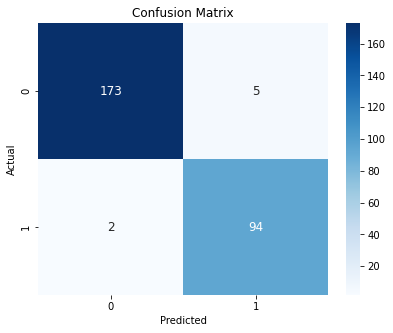

In [38]:
# Use the trained Naive Bayes model to make predictions on the test data
y_pred = rf.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()